In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('happiness_score_dataset.csv')

In [3]:
dt

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
#Display head of dataset
dt.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
#Display tail of dataset
dt.tail(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [6]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (158, 12)


In [7]:
# Dataframe columns
dt.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
# To find types of data present in the dataset
dt.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [9]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Country has ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Por

In [10]:
# Seeing for the null values in the dataset
dt.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

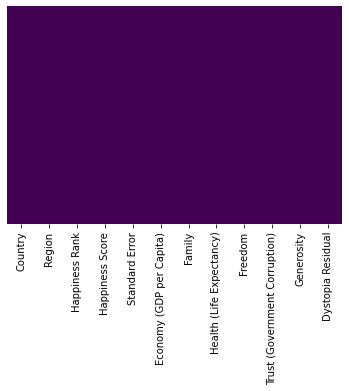

In [11]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [12]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [13]:
# To find the correlection in the dataset
dt.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [14]:
# Analysing the data 
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


<AxesSubplot:>

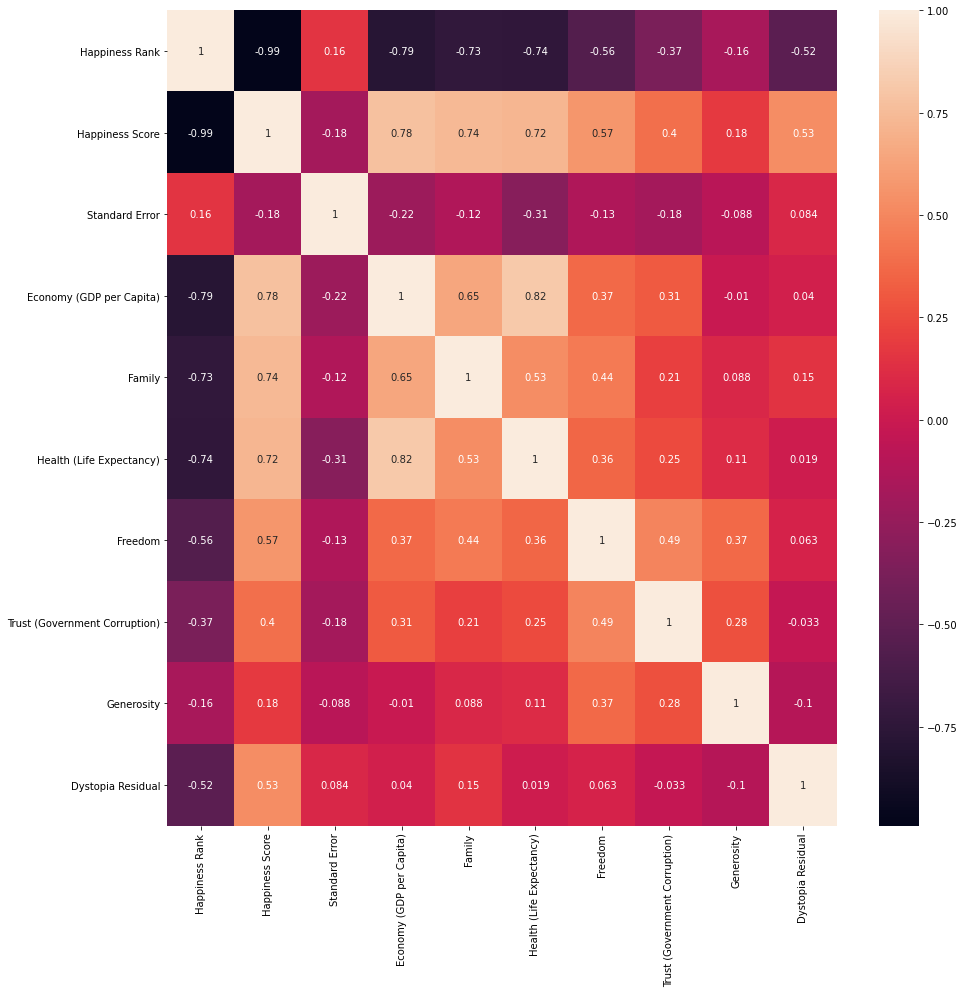

In [15]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [16]:
e['Dystopia Residual'].sort_values()

Happiness Rank                  -0.521999
Generosity                      -0.101301
Trust (Government Corruption)   -0.033105
Health (Life Expectancy)         0.018979
Economy (GDP per Capita)         0.040059
Freedom                          0.062783
Standard Error                   0.083981
Family                           0.148117
Happiness Score                  0.530474
Dystopia Residual                1.000000
Name: Dystopia Residual, dtype: float64

In [17]:
dt.drop_duplicates(keep='first',inplace=True)

In [18]:
# To see the skewness
dt.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

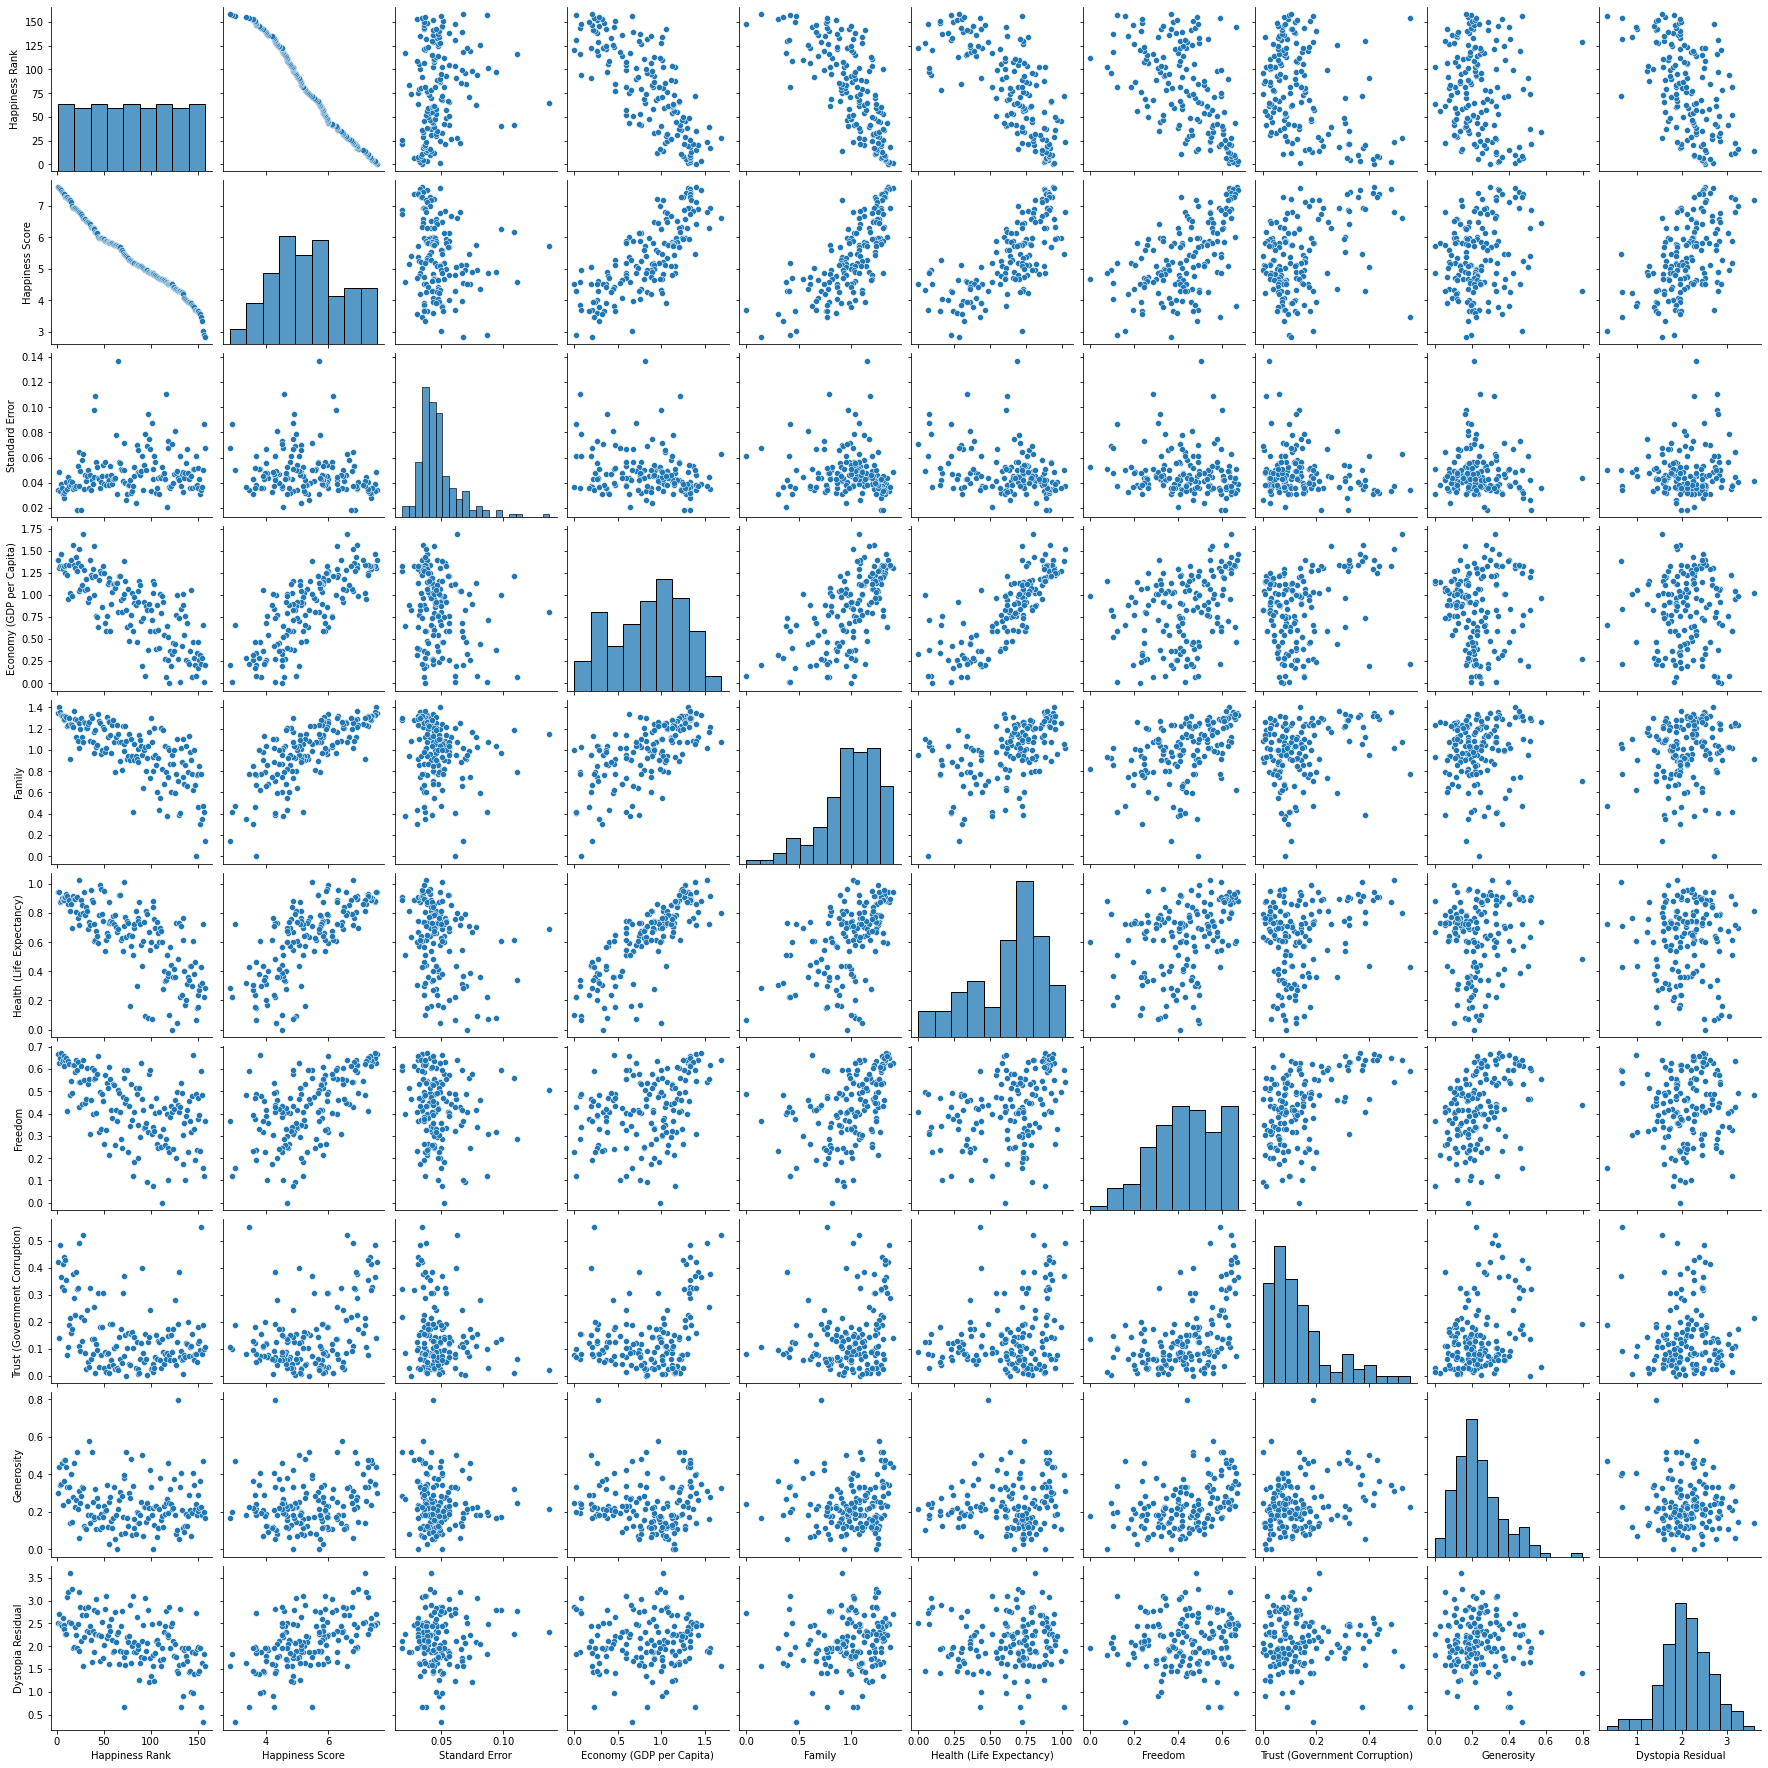

In [19]:
sns.pairplot(dt)

In [20]:
pd.DataFrame((dt.groupby('Country')['Dystopia Residual'].mean()).sort_values(ascending=False))

,Dystopia Residual
Country,
Mexico,3.60214
Brazil,3.26001
Venezuela,3.19131
Costa Rica,3.17728
Moldova,3.10712
...,...
Bulgaria,0.89991
Sri Lanka,0.67108
Rwanda,0.67042


In [21]:
pd.DataFrame((dt.groupby('Region')['Dystopia Residual'].mean()).sort_values(ascending=False))

,Dystopia Residual
Region,
Latin America and Caribbean,2.622577
North America,2.480935
Australia and New Zealand,2.265355
Western Europe,2.151185
Central and Eastern Europe,2.021400
Sub-Saharan Africa,2.019980
Southern Asia,2.016769
Middle East and Northern Africa,1.980008
Southeastern Asia,1.783020


<AxesSubplot:xlabel='Region'>

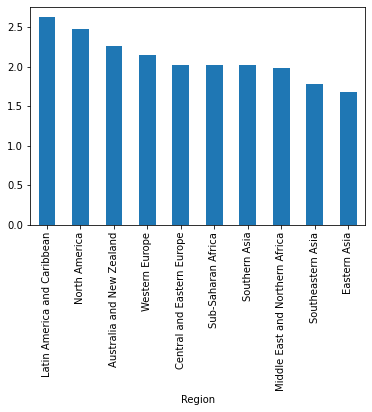

In [22]:
(dt.groupby('Region')['Dystopia Residual'].mean()).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

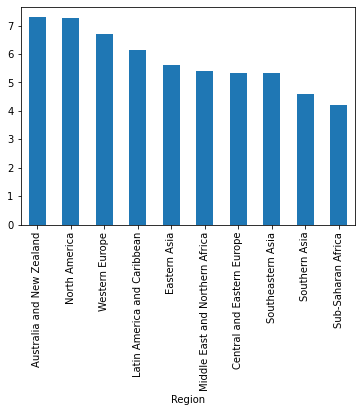

In [23]:
(dt.groupby('Region')['Happiness Score'].mean()).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

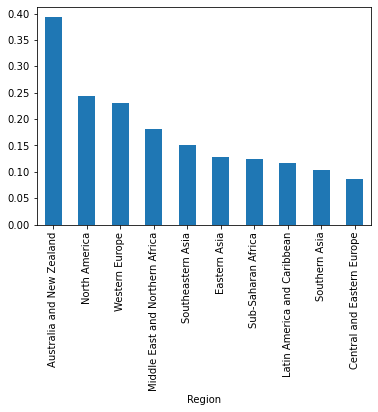

In [24]:
(dt.groupby('Region')['Trust (Government Corruption)'].mean()).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

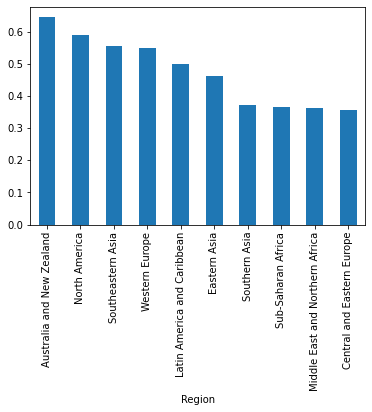

In [25]:
(dt.groupby('Region')['Freedom'].mean()).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

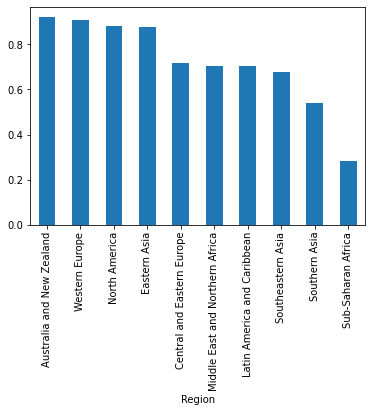

In [26]:
(dt.groupby('Region')['Health (Life Expectancy)'].mean()).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

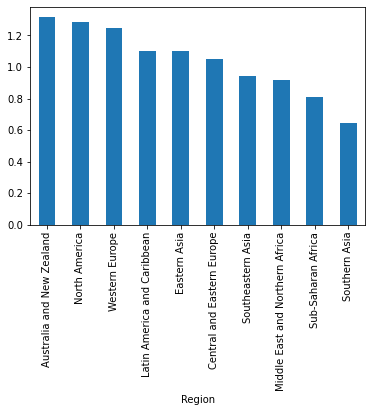

In [27]:
(dt.groupby('Region')['Family'].mean()).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

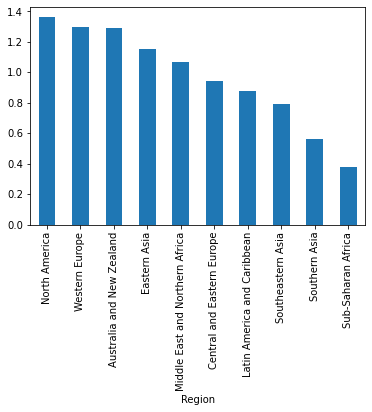

In [28]:
(dt.groupby('Region')['Economy (GDP per Capita)'].mean()).sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

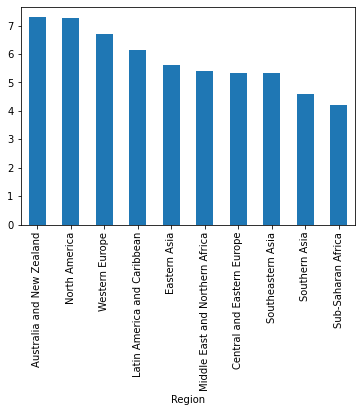

In [29]:
(dt.groupby('Region')['Happiness Score'].mean()).sort_values(ascending=False).plot(kind='bar')

In [30]:
pd.DataFrame((dt.groupby('Country')['Happiness Score'].mean()).sort_values(ascending=False))

,Happiness Score
Country,
Switzerland,7.587
Iceland,7.561
Denmark,7.527
Norway,7.522
Canada,7.427
...,...
Rwanda,3.465
Benin,3.340
Syria,3.006


In [31]:
pd.DataFrame((dt.groupby('Country')['Economy (GDP per Capita)'].mean()).sort_values(ascending=False))

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900
...,...
Liberia,0.07120
Niger,0.06940
Malawi,0.01604


In [32]:
dt.drop(columns=['Country','Happiness Rank'],inplace=True)

In [33]:
dt

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [34]:
t=dt.drop(columns=['Region'],axis=1)

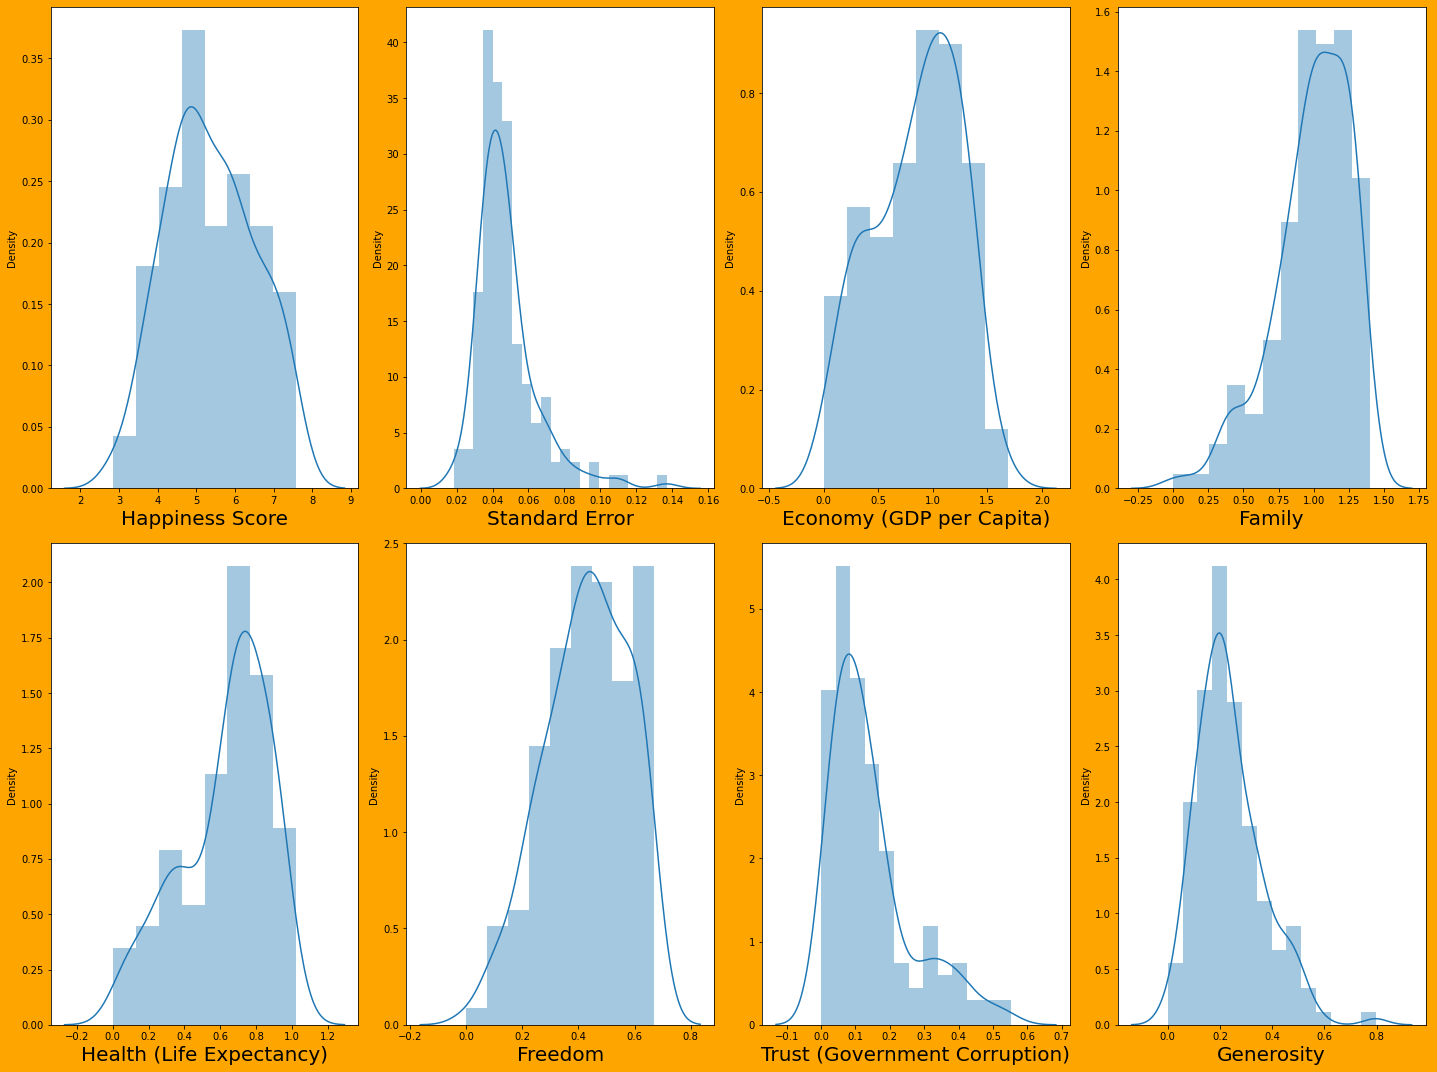

In [35]:
# The data distribution have to be analyzed
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber=1
for column in t:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(t[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

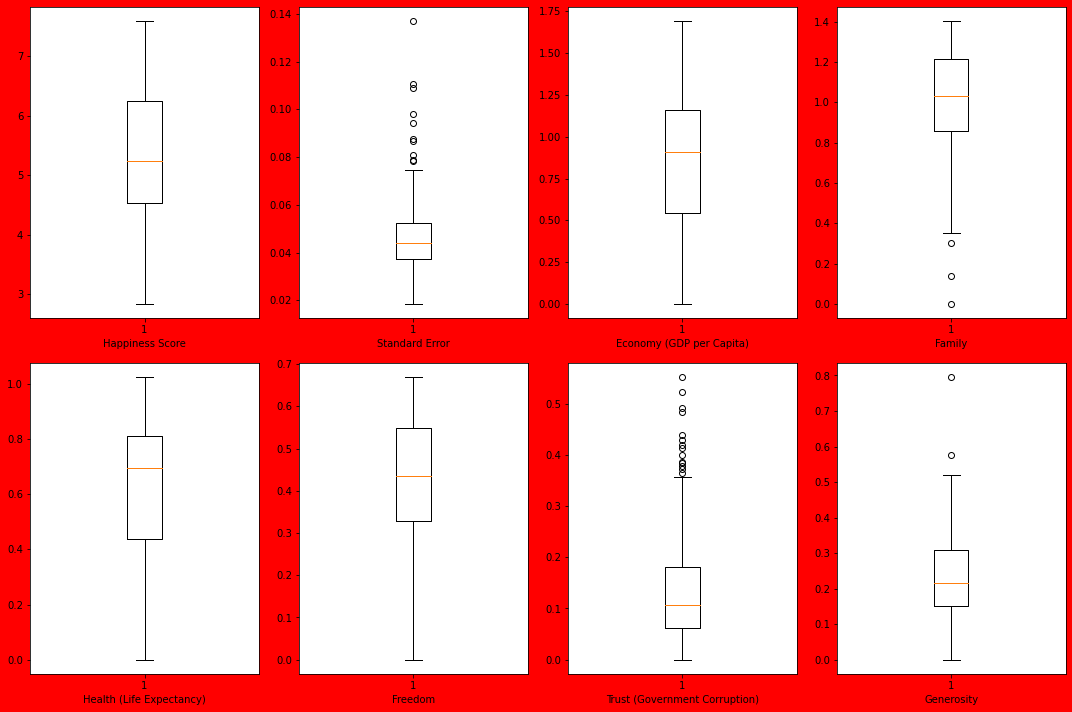

In [36]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor='red')
plotnumber=1

for column in t:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.boxplot(t[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [54]:
q1=t.quantile(0.25)
q3=t.quantile(0.75)
iqr=q3-q1

In [55]:
iqr

Happiness Score                  1.717750
Standard Error                   0.015032
Economy (GDP per Capita)         0.612640
Family                           0.357582
Health (Life Expectancy)         0.371828
Freedom                          0.220762
Trust (Government Corruption)    0.118580
Generosity                       0.159330
Dystopia Residual                0.703005
dtype: float64

In [39]:
se_h=(q3['Standard Error'] +(1.5*iqr['Standard Error']))
se_h

0.07484874999999999

In [40]:
index=np.where(dt['Standard Error']>se_h)
index

(array([ 39,  40,  62,  64,  93,  96, 100, 115, 125, 156], dtype=int64),)

In [41]:
dt['Standard Error'].iloc[index]=dt['Standard Error'].mean()

<AxesSubplot:ylabel='Density'>

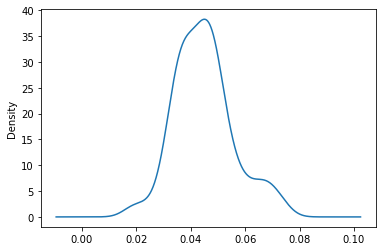

In [42]:
dt['Standard Error'].plot(kind='kde')

<AxesSubplot:>

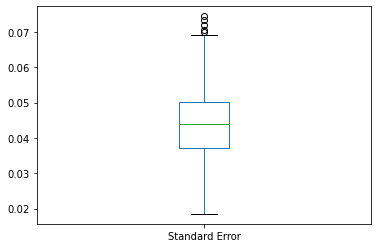

In [43]:
dt['Standard Error'].plot(kind='box')

In [44]:
q1=dt['Standard Error'].quantile(0.25)
q3=dt['Standard Error'].quantile(0.75)
iqr=q3-q1

In [45]:
iqr

0.0128775

In [46]:
se_h=(q3+(1.5*iqr))
se_h

0.06946125

In [47]:
index=np.where(dt['Standard Error']>se_h)
index

(array([ 70,  84,  97, 118, 122], dtype=int64),)

In [48]:
dt['Standard Error'].iloc[index]=dt['Standard Error'].mean()

<AxesSubplot:ylabel='Density'>

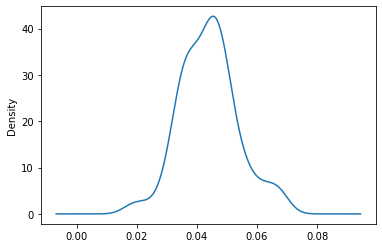

In [49]:
dt['Standard Error'].plot(kind='kde')

<AxesSubplot:>

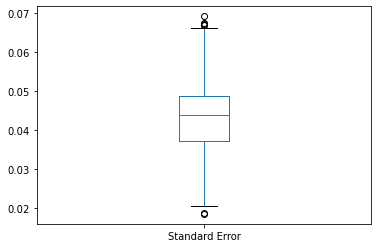

In [52]:
dt['Standard Error'].plot(kind='box')

In [56]:
f_h=(q3['Family'] -(1.5*iqr['Family']))
f_h

0.6780312500000001

In [57]:
index=np.where(dt['Family']<f_h)
index

(array([ 80,  91, 106, 108, 109, 116, 121, 125, 129, 130, 138, 144, 146,
        147, 149, 152, 154, 155, 156, 157], dtype=int64),)

In [58]:
dt['Family'].iloc[index]=dt['Family'].mean()

<AxesSubplot:ylabel='Density'>

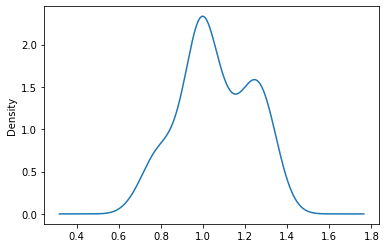

In [59]:
dt['Family'].plot(kind='kde')

<AxesSubplot:>

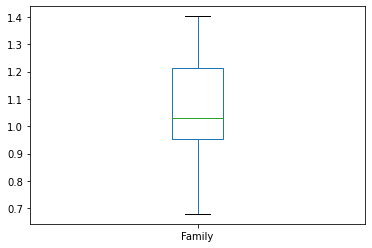

In [60]:
dt['Family'].plot(kind='box')

In [61]:
t_h=(q3['Trust (Government Corruption)']+(1.5*iqr['Trust (Government Corruption)']))
t_h

0.35812499999999997

In [62]:
index=np.where(dt['Trust (Government Corruption)']>t_h)
index

(array([  0,   2,   3,   5,   7,   8,  16,  19,  23,  27,  71,  90, 129,
        153], dtype=int64),)

In [63]:
dt['Trust (Government Corruption)'].iloc[index]=dt['Trust (Government Corruption)'].mean()

<AxesSubplot:>

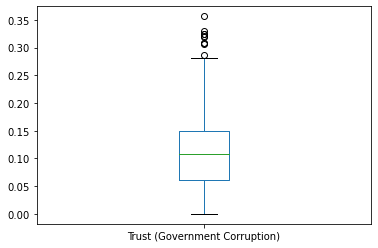

In [64]:
dt['Trust (Government Corruption)'].plot(kind='box')

In [65]:
q1=dt['Trust (Government Corruption)'].quantile(0.25)
q3=dt['Trust (Government Corruption)'].quantile(0.75)
iqr1=q3-q1

In [66]:
t1_h=(q3+(1.5*iqr1))
t1_h

0.28126249999999997

In [67]:
index=np.where(dt['Trust (Government Corruption)']>t1_h)
index

(array([ 4,  6,  9, 17, 20, 21, 34, 43, 48, 69], dtype=int64),)

In [68]:
dt['Trust (Government Corruption)'].iloc[index]=dt['Trust (Government Corruption)'].mean()

<AxesSubplot:>

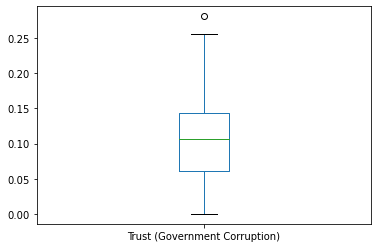

In [69]:
dt['Trust (Government Corruption)'].plot(kind='box')

In [73]:
q1=dt['Trust (Government Corruption)'].quantile(0.25)
q3=dt['Trust (Government Corruption)'].quantile(0.75)
iqr2=q3-q1

In [74]:
t2_h=(q3+(1.5*iqr2))
t2_h

0.2660420886075948

In [75]:
index=np.where(dt['Trust (Government Corruption)']>t1_h)
index

(array([], dtype=int64),)

<AxesSubplot:ylabel='Density'>

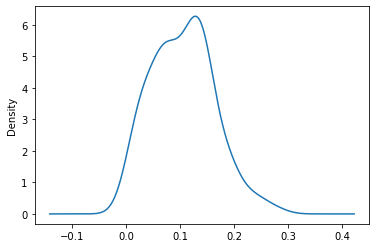

In [76]:
dt['Trust (Government Corruption)'].plot(kind='kde')

In [77]:
dt

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.034110,1.39651,1.349510,0.94143,0.66557,0.143422,0.29678,2.51738
1,Western Europe,7.561,0.048840,1.30232,1.402230,0.94784,0.62877,0.141450,0.43630,2.70201
2,Western Europe,7.527,0.033280,1.32548,1.360580,0.87464,0.64938,0.143422,0.34139,2.49204
3,Western Europe,7.522,0.038800,1.45900,1.330950,0.88521,0.66973,0.143422,0.34699,2.46531
4,North America,7.427,0.035530,1.32629,1.322610,0.90563,0.63297,0.117943,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.034640,0.22208,0.773700,0.42864,0.59201,0.143422,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.036560,0.28665,0.991046,0.31910,0.48450,0.080100,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.050150,0.66320,0.991046,0.72193,0.15684,0.189060,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.047885,0.01530,0.991046,0.22396,0.11850,0.100620,0.19727,1.83302


In [78]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [79]:
# Assigning to a variable
le=LabelEncoder()

In [80]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['Region']=le.fit_transform(dt['Region'])

In [81]:
dt

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.034110,1.39651,1.349510,0.94143,0.66557,0.143422,0.29678,2.51738
1,9,7.561,0.048840,1.30232,1.402230,0.94784,0.62877,0.141450,0.43630,2.70201
2,9,7.527,0.033280,1.32548,1.360580,0.87464,0.64938,0.143422,0.34139,2.49204
3,9,7.522,0.038800,1.45900,1.330950,0.88521,0.66973,0.143422,0.34699,2.46531
4,5,7.427,0.035530,1.32629,1.322610,0.90563,0.63297,0.117943,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,3.465,0.034640,0.22208,0.773700,0.42864,0.59201,0.143422,0.22628,0.67042
154,8,3.340,0.036560,0.28665,0.991046,0.31910,0.48450,0.080100,0.18260,1.63328
155,4,3.006,0.050150,0.66320,0.991046,0.72193,0.15684,0.189060,0.47179,0.32858
156,8,2.905,0.047885,0.01530,0.991046,0.22396,0.11850,0.100620,0.19727,1.83302


In [83]:
# Assignment of X and y
X=dt.drop(['Dystopia Residual'], axis=1)
y=dt['Dystopia Residual']

In [84]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [85]:
# Importing PCA components
from sklearn.decomposition import PCA

In [86]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-3.54883698,  1.42009988, -0.27708459, ..., -0.21072204,
        -0.12221492, -0.26187543],
       [-3.35740668,  1.597574  ,  0.61737591, ...,  0.45645978,
        -0.0281864 , -0.39969766],
       [-3.37333391,  1.6791957 , -0.41935592, ...,  0.05149825,
        -0.23369509, -0.17944676],
       ...,
       [ 1.53529508,  0.5856183 ,  0.78836779, ...,  1.78879779,
         1.47631271,  0.36651372],
       [ 3.83015428,  0.47459228, -0.35034324, ...,  1.25477531,
         0.51443628, -0.27706756],
       [ 3.32273072,  0.36645901,  1.50735028, ...,  0.14605468,
         1.04755357, -0.10374278]])

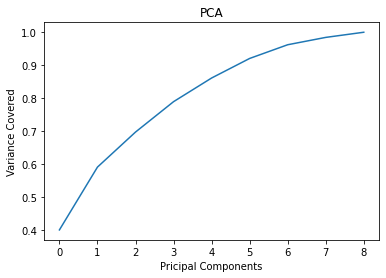

In [87]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [88]:
pca=PCA(n_components=8)
new_pcomp=pca.fit_transform(X_scaled)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [89]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.548837,1.420100,-0.277085,-0.443765,-0.929897,0.371924,-0.210722,-0.122215
1,-3.357407,1.597574,0.617376,1.089696,-1.015311,0.680442,0.456460,-0.028186
2,-3.373334,1.679196,-0.419356,-0.269290,-0.816208,0.293682,0.051498,-0.233695
3,-3.422047,1.533989,0.056995,0.050621,-0.919240,0.481444,-0.175553,-0.204336
4,-3.433344,1.051285,-0.485280,0.770299,0.297545,-0.038265,0.333534,-0.306271
...,...,...,...,...,...,...,...,...
153,2.056127,1.874472,-0.283134,-0.859675,0.740875,-0.715505,-1.447966,0.662210
154,2.151615,1.097477,-1.006453,-0.462358,-0.478055,-0.904908,-0.519444,0.729688
155,1.535295,0.585618,0.788368,0.566855,1.871484,1.242958,1.788798,1.476313
156,3.830154,0.474592,-0.350343,-0.246387,-0.522872,0.195587,1.254775,0.514436


In [90]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [91]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.6639485482863026
At random state, 1, the testing accuracy is :0.5821210464327694


At random state, 2, the training accuracy is :0.6214934371964925
At random state, 2, the testing accuracy is :0.719722089017087


At random state, 3, the training accuracy is :0.6405580530684072
At random state, 3, the testing accuracy is :0.6690078573097291


At random state, 4, the training accuracy is :0.6263728152007801
At random state, 4, the testing accuracy is :0.6553061356451841


At random state, 5, the training accuracy is :0.6331291603385236
At random state, 5, the testing accuracy is :0.7030564175433782


At random state, 6, the training accuracy is :0.6349884115379691
At random state, 6, the testing accuracy is :0.6996696625019923


At random state, 7, the training accuracy is :0.633185529834787
At random state, 7, the testing accuracy is :0.706474258375642


At random state, 8, the training accuracy is :0.6407184715837868
At random state, 8, t

In [92]:
for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.9371431531732941
At random state, 1, the testing accuracy is :0.4103041510863845


At random state, 2, the training accuracy is :0.9184218192345506
At random state, 2, the testing accuracy is :0.6596899394048291


At random state, 3, the training accuracy is :0.927341607220388
At random state, 3, the testing accuracy is :0.6409523472894492


At random state, 4, the training accuracy is :0.9228631137289909
At random state, 4, the testing accuracy is :0.5343651672082566


At random state, 5, the training accuracy is :0.9190833074968754
At random state, 5, the testing accuracy is :0.625774526928006


At random state, 6, the training accuracy is :0.927114673283611
At random state, 6, the testing accuracy is :0.6397320434387317


At random state, 7, the training accuracy is :0.9222549061375196
At random state, 7, the testing accuracy is :0.6306967809059884


At random state, 8, the training accuracy is :0.947091521899445
At random state, 8, th

In [93]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :1.0
At random state, 1, the testing accuracy is :-0.0059004104407420765


At random state 2, the training accuracy is :1.0
At random state, 2, the testing accuracy is :0.5572091696729665


At random state 3, the training accuracy is :1.0
At random state, 3, the testing accuracy is :0.07616819042121259


At random state 4, the training accuracy is :1.0
At random state, 4, the testing accuracy is :0.2808465718711384


At random state 5, the training accuracy is :1.0
At random state, 5, the testing accuracy is :-0.33561873313803336


At random state 6, the training accuracy is :1.0
At random state, 6, the testing accuracy is :0.360832011371214


At random state 7, the training accuracy is :1.0
At random state, 7, the testing accuracy is :0.39303776998680695


At random state 8, the training accuracy is :1.0
At random state, 8, the testing accuracy is :0.2009406821134745


At random state 9, the training accuracy is :1.0
At random state, 9, the 

In [94]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9999986588070217
At random state, 1, the testing accuracy is :0.5104810493287553


At random state 2, the training accuracy is :0.9999981796214881
At random state, 2, the testing accuracy is :0.6342824914402705


At random state 3, the training accuracy is :0.9999976441257156
At random state, 3, the testing accuracy is :0.6533193506918664


At random state 4, the training accuracy is :0.9999982937280014
At random state, 4, the testing accuracy is :0.6387132087430964


At random state 5, the training accuracy is :0.9999979327091756
At random state, 5, the testing accuracy is :0.5086088837263616


At random state 6, the training accuracy is :0.999998394223026
At random state, 6, the testing accuracy is :0.6770253783394606


At random state 7, the training accuracy is :0.9999983667112513
At random state, 7, the testing accuracy is :0.6302543567436258


At random state 8, the training accuracy is :0.9999978467846411
At random state, 8, the tes

In [96]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.8168506508808111
At random state, 1, the testing accuracy is :0.4185955149785897


At random state, 2, the training accuracy is :0.7577474798162867
At random state, 2, the testing accuracy is :0.6492772883694775


At random state, 3, the training accuracy is :0.7784637676148055
At random state, 3, the testing accuracy is :0.47955357845025093


At random state, 4, the training accuracy is :0.8201104122289932
At random state, 4, the testing accuracy is :0.5671223801298564


At random state, 5, the training accuracy is :0.7776284301855523
At random state, 5, the testing accuracy is :0.5882046572692932


At random state, 6, the training accuracy is :0.7794539417168777
At random state, 6, the testing accuracy is :0.6802620677282469


At random state, 7, the training accuracy is :0.7641565190864181
At random state, 7, the testing accuracy is :0.5608326520680071


At random state, 8, the training accuracy is :0.8394102108673218
At random state, 

In [97]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-0.9596909617159919
At random state, 1, the testing accuracy is :0.092501532600195


At random state 2, the training accuracy is :-1.572272140605648
At random state, 2, the testing accuracy is :0.09367640158382817


At random state 3, the training accuracy is :-0.8789349893717091
At random state, 3, the testing accuracy is :0.04114033753015378


At random state 4, the training accuracy is :-1.5881337335011003
At random state, 4, the testing accuracy is :0.1787053227371358


At random state 5, the training accuracy is :-0.7895332402284934
At random state, 5, the testing accuracy is :-0.01838995583846037


At random state 6, the training accuracy is :-0.9282710542121078
At random state, 6, the testing accuracy is :-0.39808551461716


At random state 7, the training accuracy is :-0.826658566544509
At random state, 7, the testing accuracy is :0.23384193987636104


At random state 8, the training accuracy is :-0.8255404109609126
At random state, 

In [98]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    gc=GradientBoostingRegressor()
    gc.fit(x_train, y_train)
    predtrain=gc.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.989369683803677
At random state, 1, the testing accuracy is :0.6800831056076109


At random state, 2, the training accuracy is :0.9863600209088296
At random state, 2, the testing accuracy is :0.8612979468850004


At random state, 3, the training accuracy is :0.9894558936094997
At random state, 3, the testing accuracy is :0.8318735690991377


At random state, 4, the training accuracy is :0.9902899102064839
At random state, 4, the testing accuracy is :0.734215379083424


At random state, 5, the training accuracy is :0.9881841848280376
At random state, 5, the testing accuracy is :0.7942143132767698


At random state, 6, the training accuracy is :0.9878405173488589
At random state, 6, the testing accuracy is :0.8591047904613234


At random state, 7, the training accuracy is :0.9862549121572033
At random state, 7, the testing accuracy is :0.8161669788838751


At random state, 8, the training accuracy is :0.9867398703695969
At random state, 8, 

In [99]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.8206847463919172
At random state, 1, the testing accuracy is :0.58147442606668


At random state 2, the training accuracy is :0.656668871384256
At random state, 2, the testing accuracy is :0.7374081414580631


At random state 3, the training accuracy is :0.7489445701095401
At random state, 3, the testing accuracy is :0.6708941374822992


At random state 4, the training accuracy is :0.7245101929507998
At random state, 4, the testing accuracy is :0.6639838861408638


At random state 5, the training accuracy is :0.7816028091636721
At random state, 5, the testing accuracy is :0.6585267198354499


At random state 6, the training accuracy is :0.8135649220784239
At random state, 6, the testing accuracy is :0.4049260047862834


At random state 7, the training accuracy is :0.8002351328671811
At random state, 7, the testing accuracy is :0.6200235190248491


At random state 8, the training accuracy is :0.8003011309401964
At random state, 8, the testi

At random state 691, the training accuracy is :0.7599826018409201
At random state, 691, the testing accuracy is :0.6728804410535371

In [102]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=412)
gc=GradientBoostingRegressor()
gc.fit(x_train, y_train)
predtrain=gc.predict(x_train)
predtest=ad.predict(x_test)
print(f"At random state, {412}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {412}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 412, the training accuracy is :0.9904170846033381
At random state, 412, the testing accuracy is :0.8902601947605793


In [103]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 0.16670162020006102
The MSE is 0.16670162020006102 and RMSE is 0.40829109738036296


In [104]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators' : range(5,10),
           'max_depth': range(5,15),
           'min_samples_split': range(2,15),
           'min_samples_leaf':range(2,15),
           'learning_rate':[0.001,0.01,0.1,1,10]}

In [106]:
c=GridSearchCV(GradientBoostingRegressor(),param_grid=parameters)
c.fit(x_train, y_train)
print('The beast combination of the parameters are ',c.best_params_)

The beast combination of the parameters are  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 9}


In [113]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=412)
gc=GradientBoostingRegressor(learning_rate=0.1, min_samples_leaf=5, min_samples_split=4, n_estimators=9)
gc.fit(x_train, y_train)
predtrain=gc.predict(x_train)
predtest=ad.predict(x_test)
print(f"At random state, {412}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {412}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 412, the training accuracy is :0.9904170846033381
At random state, 412, the testing accuracy is :0.8902601947605793


In [ ]:
#pickling
import pickle
filename = 'whr'
outfile = open(filename,'whr')
pickle.dump(sp_dict,outfile)
outfile.close()

# Conclusion
The happiness data score dataset was imported and EDA was performed. line 20-29 shows different countries that was good. Encoding is performed and different models were used for performed. At random state, 412, the training accuracy is :0.9904170846033381. At random state, 412, the testing accuracy is :0.8902601947605793